<a href="https://colab.research.google.com/github/Natalee2020/Final_submission_17.03.2021/blob/main/Copy_of_tutorial1_SLregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using SciKitLearn
In this tutorial we are going to use an already clean dataset from the [Nomadlist Cities](https://nomadlist.com/) data to predict the continent where the city is located.

We are using [ScikitLearn library](https://scikit-learn.org/stable/index.html)

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


## Loading and selecting the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load data
/content/gdrive/MyDrive/Copy of DATASET_nomad.csv

In [ ]:
data.info()

NameError: ignored

## Predicting the Nomad Score


Prepare data

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = data.loc[:,'cost_nomad':'weed']

NameError: ignored

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

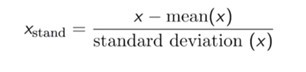

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Define the dependant variable / target to predict 
y_reg = data.nomad_score

In [ ]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

Train model

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(model.score(X_test, y_test))

0.8626880465498492


more info about the model class here https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
print("Coefficient", model.coef_, "intercetp",  model.intercept_)

Coefficient [-0.02857005  0.00235348 -0.00053784  0.00303359  0.00303359  0.02015503
 -0.00437667  0.01765882 -0.00934708  0.00480372 -0.00654356  0.01416936
 -0.02509096  0.00105645  0.00089191 -0.00309672  0.00278731  0.00121177
  0.10743123  0.0066859   0.00303627] intercetp 0.6506145526823569


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


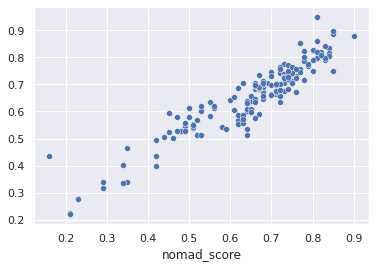

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 595 to 168
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cost_nomad              156 non-null    float64
 1   cost_coworking          156 non-null    float64
 2   cost_expat              156 non-null    float64
 3   coffee_in_cafe          156 non-null    float64
 4   cost_beer               156 non-null    float64
 5   places_to_work          156 non-null    float64
 6   free_wifi_available     156 non-null    float64
 7   internet_speed          156 non-null    float64
 8   freedom_score           156 non-null    float64
 9   peace_score             156 non-null    float64
 10  safety                  156 non-null    float64
 11  fragile_states_index    156 non-null    float64
 12  press_freedom_index     156 non-null    float64
 13  female_friendly         156 non-null    float64
 14  lgbt_friendly           156 non-null    

In [ ]:
data_test['nomad_score_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='nomad_score',
    y='nomad_score_pred',
    color=alt.Color('region', scale=alt.Scale(scheme='category10')),
    tooltip=['region', 'place']
).interactive()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

Let's try a different model class

In [ ]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

[05:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9331527383834222


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


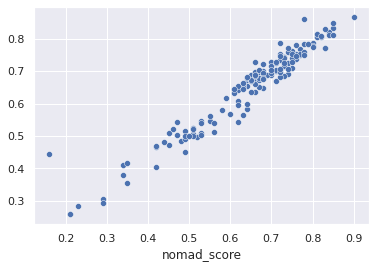

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test['nomad_score_predXG'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='nomad_score',
    y='nomad_score_predXG',
    color=alt.Color('region', scale=alt.Scale(scheme='category10')),
    tooltip=['region','place']
).interactive()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

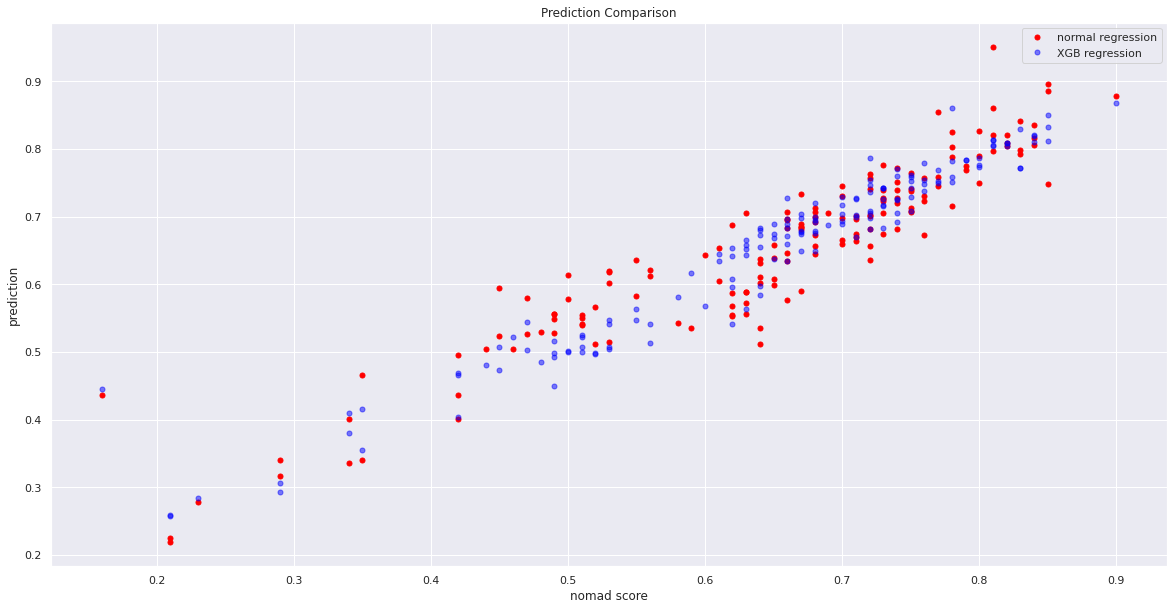

In [ ]:
#Comparative plot
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()
ax1.plot(data_test["nomad_score"], data_test["nomad_score_pred"], color = "red", label = "normal regression",linestyle='None', marker = "o", markersize = 5)
ax1.plot(data_test["nomad_score"], data_test["nomad_score_predXG"], color = "blue", label = "XGB regression",linestyle='None',marker = "o", markersize = 5, alpha= 0.5)


ax1.set_xlabel('nomad score')
ax1.set_ylabel('prediction')
ax1.legend()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.title('Prediction Comparison')
plt.show()